<a href="https://colab.research.google.com/github/Gaurav927/Autoencoder_MNIST/blob/master/AutoEncoder_using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np

In [0]:
batch_size =64

train_dataset = datasets.MNIST(root='./MNIST/',train=True,download=True,
                               transform=transforms.ToTensor())

test_dataset = datasets.MNIST(root='./MNIST/',train=False,download=True,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

### Using Neural Network

In [0]:
#Encoder
class Encoder_net(nn.Module):  
    def __init__(self):
        super(Encoder_net, self).__init__()
        self.lin1 = nn.Linear(784, 400)
        self.lin2 = nn.Linear(400, 100)
        self.lin3 = nn.Linear(100, 2)
        
    def forward(self, x):
        x = F.dropout(self.lin1(x), p=0.25, training=self.training)
        x = F.relu(x)
        x = F.dropout(self.lin2(x), p=0.25, training=self.training)
        x = F.relu(x)
        x = self.lin3(x)
        return torch.tanh(x)

# Decoder
class Decoder_net(nn.Module):  
    def __init__(self):
        super(Decoder_net, self).__init__()
        self.lin1 = nn.Linear(2, 100)
        self.lin2 = nn.Linear(100, 400)
        self.lin3 = nn.Linear(400, 784)
    def forward(self, x):
        x = F.leaky_relu(self.lin1(x), 0.2)
        x = F.leaky_relu(self.lin2(x), 0.2)
        x = F.leaky_relu(self.lin3(x), 0.2)
        
        return torch.tanh(x)

In [0]:
encoder = Encoder_net()
decoder = Decoder_net()

# define loss
loss = nn.MSELoss()

# Set learning rates
gen_lr = 0.0001

#encode/decode optimizers
optim_dec = torch.optim.Adam(decoder.parameters(), lr=gen_lr)
optim_enc = torch.optim.Adam(encoder.parameters(), lr=gen_lr)

In [5]:
global_loss =[]
num_epochs =20
total_step = len(train_loader)


for epoch in range(num_epochs):
    Loss= 0
    train_correct =0
    for i ,(images,_) in enumerate(train_loader):
        optim_dec.zero_grad()
        optim_enc.zero_grad()

        batch_size = images.size(0)

        images = images.view(batch_size, -1)
        images = Variable(images,requires_grad =False)

        z = encoder(images)
        x = decoder(z)
        
        recon_loss = loss(images,x)
        
        Loss+= recon_loss.item()
        
        recon_loss.backward()
        optim_dec.step()
        optim_enc.step()
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Reconstruction_loss {:.4f}' 
                      .format(epoch, num_epochs, i+1, total_step, recon_loss.item()))
    global_loss.append(Loss)

Epoch [0/20], Step [200/938], Reconstruction_loss 0.0640
Epoch [0/20], Step [400/938], Reconstruction_loss 0.0626
Epoch [0/20], Step [600/938], Reconstruction_loss 0.0622
Epoch [0/20], Step [800/938], Reconstruction_loss 0.0551
Epoch [1/20], Step [200/938], Reconstruction_loss 0.0456
Epoch [1/20], Step [400/938], Reconstruction_loss 0.0524
Epoch [1/20], Step [600/938], Reconstruction_loss 0.0528
Epoch [1/20], Step [800/938], Reconstruction_loss 0.0486
Epoch [2/20], Step [200/938], Reconstruction_loss 0.0518
Epoch [2/20], Step [400/938], Reconstruction_loss 0.0497
Epoch [2/20], Step [600/938], Reconstruction_loss 0.0467
Epoch [2/20], Step [800/938], Reconstruction_loss 0.0470
Epoch [3/20], Step [200/938], Reconstruction_loss 0.0471
Epoch [3/20], Step [400/938], Reconstruction_loss 0.0516
Epoch [3/20], Step [600/938], Reconstruction_loss 0.0457
Epoch [3/20], Step [800/938], Reconstruction_loss 0.0488
Epoch [4/20], Step [200/938], Reconstruction_loss 0.0495
Epoch [4/20], Step [400/938], R

In [0]:
# Function to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.axis('off')
    plt.show()

torch.Size([64, 1, 28, 28])
torch.Size([64])


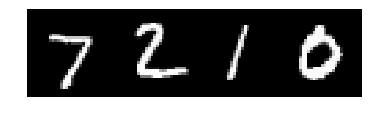

In [7]:
# get some random training images
dataiter = iter(test_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images[:4],nrow=4))

In [8]:
images = images.view(64, -1)

print(images.shape)

torch.Size([64, 784])


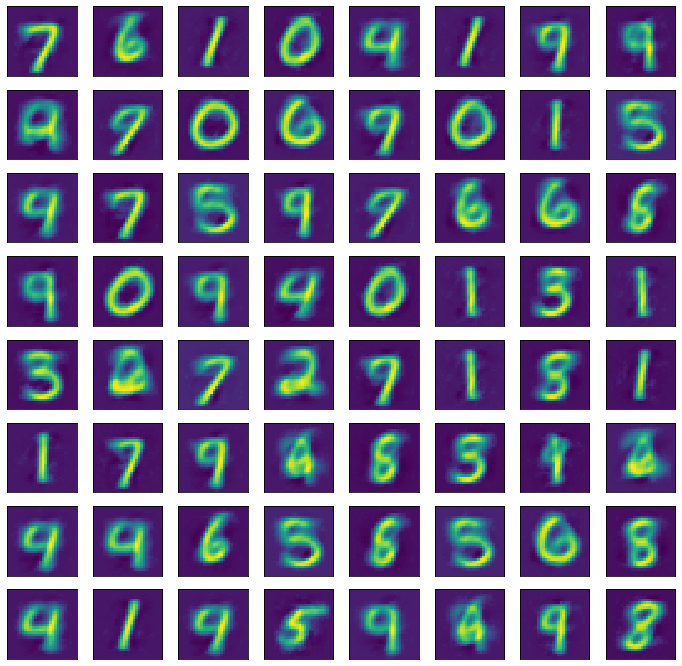

In [9]:
# Visualize the reconstructed image

decoder.eval()
encoder.eval()

Z = encoder(images)

X = decoder(Z)

X = X.reshape((64,28,28)) 

X=X.cpu().detach().numpy()

fig=plt.figure(figsize=(12, 12))

columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = X[i-1]
    fig.add_subplot(rows, columns,i)
    
    show = plt.imshow(img)
    show.axes.get_xaxis().set_visible(False)
    show.axes.get_yaxis().set_visible(False)
plt.savefig('result.jpg')
plt.show()

In [10]:
labels

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])

In [11]:
# For Plotting dimension reduced representation of data

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=10000,
                                          shuffle=False)
dataiter = iter(test_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)


torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [0]:
images = images.view(images.size(0), -1)


Z = encoder(images)

X = decoder(Z)

X = X.reshape((images.size(0),28,28)) 

X=X.cpu().detach().numpy()

In [0]:
import seaborn as sns
import pandas as pd
Z = Z.cpu().detach().numpy()

In [0]:
data = pd.DataFrame({'dim1': Z[:,0],'dim2':Z[:,1]})

data['label'] = labels

In [15]:
data.head()

,dim1,dim2,label
0,0.514280,0.928671,7
1,-0.087975,-0.116220,2
2,-0.966132,0.999964,1
3,0.477461,-0.584244,0
4,0.393647,0.253580,4


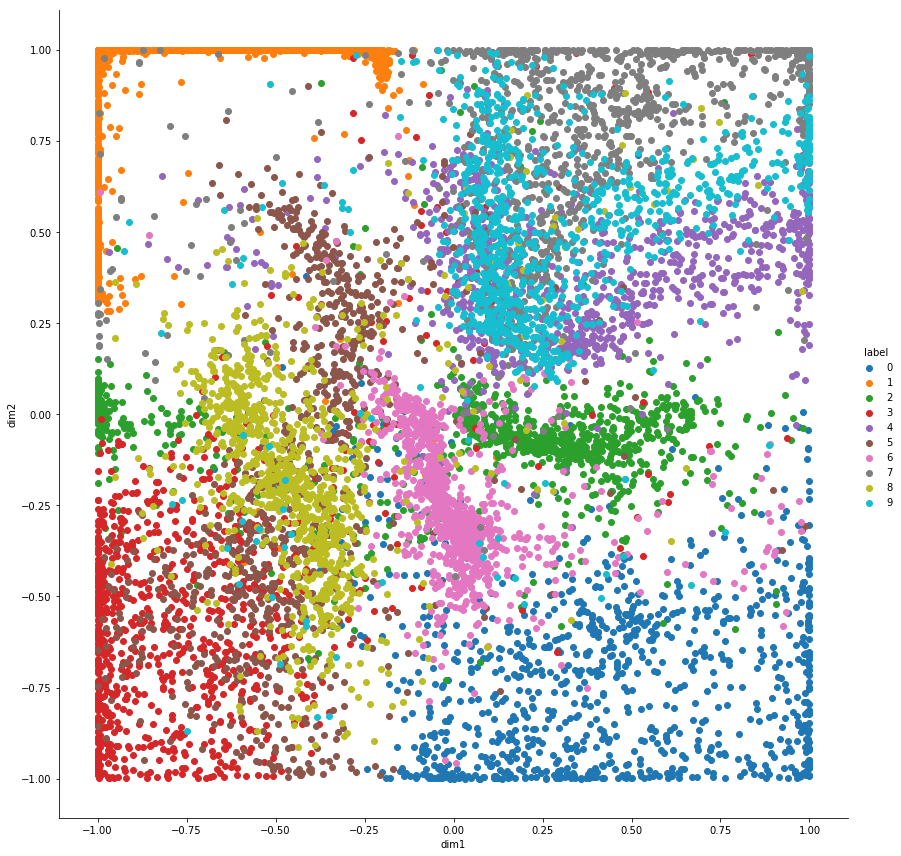

In [16]:
g = sns.FacetGrid(data, hue='label', height=12).map(plt.scatter, 'dim1', 'dim2').add_legend()
